# MEDICAL COST ANALYSIS
The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables.

# IMPORTING THE LIBRARIES

In [5]:
#Import required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [6]:
#read the data and assign to a variable
data= pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Dataset has 7 columns(variables) and 1338 rows(observations)

In [7]:
#checking the information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 2 integer type, 2 float type, and 3 object type. There is no null element in the data set 

In [8]:
#Checking for empty values in the dataset
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#checking for duplicate elements in the dataset
print('Dataset has ', data.duplicated().sum(), 'duplicate(s)')

Dataset has  1 duplicate(s)


In [10]:
#visualizing the duplicated row
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


The duplicated element is at row number 581, we need to drop this row


In [11]:
#removing the duplicated element
data.drop_duplicates(keep= 'first', inplace= True)

In [12]:
#checking if we successfully removed it
print('Dataset has',  data.duplicated().sum(), 'duplicate(s)')

Dataset has 0 duplicate(s)


In [13]:
#checking basic statistic information about the data set
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Looking at the age column, we can see that the average age is 39 years, the data represents the distribution of an adult population.
The bmi is normally distributed, the values of the mean and median are close.
75% of the population have 2 or less children.
The charges distribution is positively skewed because the mean is greater than the median value.

# EXPLORATORY DATA ANALYSIS


### Examine the distribution of BMI in the data set

Text(0.5, 1.0, 'BMI Distribution')

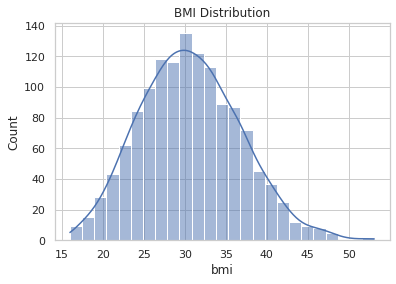

In [14]:
#insert grid lines for better readability
sns.set(style= 'whitegrid')
#plot a histogram of the bmi distribution
sns.histplot(data, x='bmi', kde= True)
plt.title('BMI Distribution')


The bmi is normally distributed, the mode is 30

### Examine the relationship between 'smoker' and 'charges'

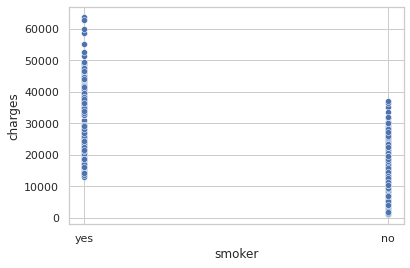

In [15]:
sns.scatterplot(x= 'smoker', y='charges', data=data)

A smoker incurs more charges than a non-smoker

### Examine the relationship between 'smoker' and 'region'

In [16]:
#grouping the 'smoker' variable by the regions
data.groupby(['region', 'smoker']).size().reset_index(name= 'Count')


,region,smoker,Count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,266
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


Text(0.5, 1.0, 'Smoker by Region')

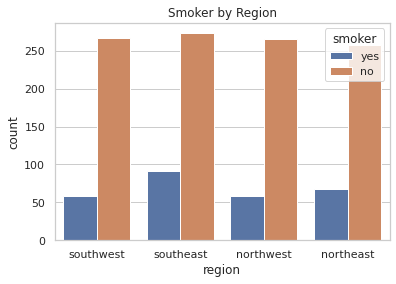

In [17]:
sns.countplot(x= 'region', hue= 'smoker', data= data)
plt.title('Smoker by Region')

From above, we deduced that the region with the highest smokers in the SouthEast region. There is great difference between smokers and non-smokers in all the regions. 

### Examine the relationship between BMI and Sex

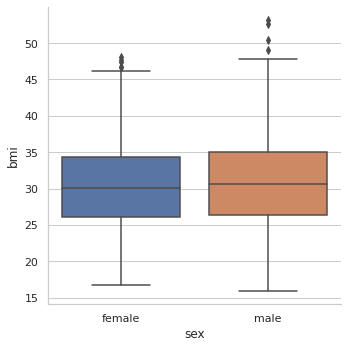

In [18]:
sns.catplot(data= data, x= 'sex', y= 'bmi', kind= 'box')

The median value of BMI for male is greater than 30, which is higher than that of female. The minimum BMI value for the male is lower than the female, while the maximum BMI value is greater than that of female. Both sexes have outliers in their BMI distribution.

### Find the region with the most children

In [19]:
#displaying the number of children by region
num_of_children= data.groupby('region')['children'].sum()
num_of_children

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

Text(0.5, 1.0, 'Children Count By Region')

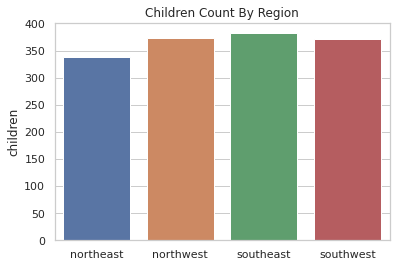

In [20]:
sns.barplot(x = num_of_children.index.tolist(), y = num_of_children)
plt.title('Children Count By Region')

According to the graph above, the region with the most children is the Southeast

### Examine the relationship between age and bmi

Text(0.5, 1.0, 'Age : BMI')

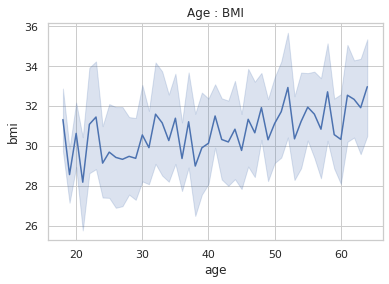

In [21]:
#showing this relationship using a lineplot, I removed the confidence interval by passing the argument, ci= None.
sns.lineplot(data= data, x='age', y='bmi')
plt.title('Age : BMI')

Although the BMI flucatuates across different ages, there is a general increase in the BMI with age.

### Examine the relationship between bmi and children

In [22]:
data.groupby(['children'])['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,573.0,30.550227,6.044383,15.960,26.12500,30.300,34.7700,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.015,34.2375,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.640,35.3575,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.495,34.3200,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.640,33.6600,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.550,33.0550,46.75


Text(0.5, 1.0, 'BMI : Children')

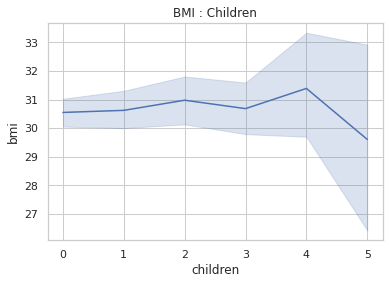

In [23]:
sns.lineplot(data= data, x= 'children', y= 'bmi')
plt.title('BMI : Children')

There is no linear relationship between BMI and children. The BMI remains fairly constant with 0 and 1 child, increases with 2 children and decreases afterthen rises after 3, peaks at 4 and steadily decreases after 4 children. 

### Is there an outlier in the bmi variable, please review

Text(0.5, 1.0, 'BMI Distribution')

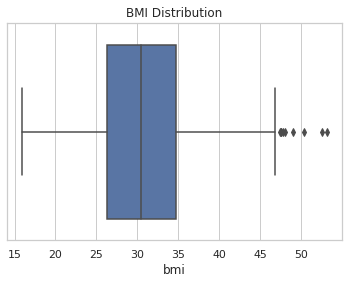

In [24]:
#using the box plot
sns.boxplot(x= 'bmi', data=data)
plt.title('BMI Distribution')

The values outside the whiskers reperesent outliers. So yes, there are outliers in the bmi variable.

### Examine the relationship between bmi and charges

Text(0.5, 1.0, 'Charges : BMI')

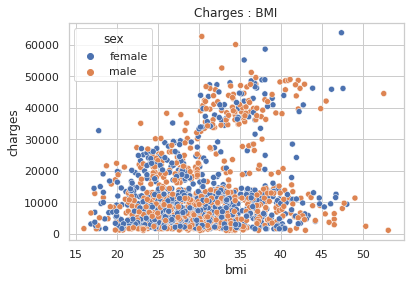

In [25]:
sns.scatterplot(x= 'bmi', y= 'charges',hue= 'sex', data= data)
plt.title('Charges : BMI')

There is no clear relationship between BMI and charges. The charges vary for other reasons.


### Examine the relationship between Region, Smoker, and BMI

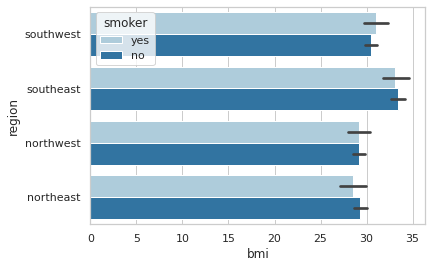

In [26]:
sns.barplot(data=data, x= 'bmi', y= 'region', hue= 'smoker', palette= 'Paired')

There are slight differences between the BMIs of smokers and non-smokers across all regions except the Northwest region where the distribution of BMIs is almost negligible.

# DATA PROCESSING

In [27]:
#custom class to encode multiple columns since the default LabelEncoder() only takes a 1-d array as an argument 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [28]:
# Changing categorical variables; sex, smoker, and region to numerical variables using one-hot encoding technique
data = MultiColumnLabelEncoder(columns = ['sex','smoker','region']).fit_transform(data)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


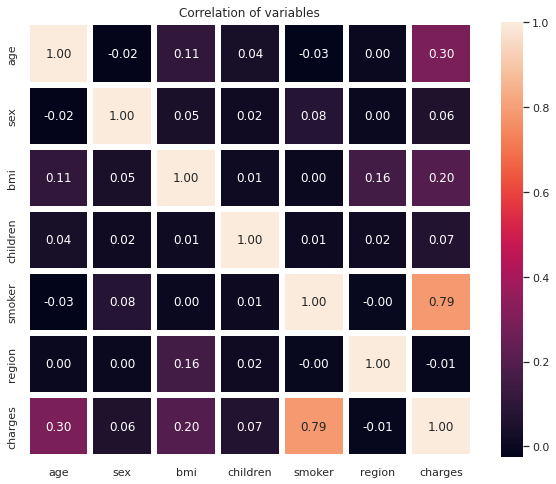

In [29]:
#Checking correlation between features
plt.figure(figsize=(10,8)) 
plt.title('Correlation of variables')
sns.heatmap(data.corr(),vmax=1.0, fmt='.2f', linewidths=5, annot=True)
plt.show()

In [30]:
#Correlation: checking which inputs has the most impact on the output i.e charges
data.corr()["charges"].sort_values(ascending=False)  

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

In [31]:
#Assigning X and y variables
X = data.drop(['charges'],axis=1)
y = data.loc[:,"charges"]

In [32]:
#Split the dataset into train and test sets with 70-30 ratio
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3)

In [33]:
#Saving the columns names
feature_names = Xtrain.columns

### Scaling by Normalizing

In [34]:
#Using the standard scaling to scale the data
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)
Xtrain = pd.DataFrame(Xtrain,columns=feature_names)
Xtest = pd.DataFrame(Xtest,columns=feature_names)

# MODEL SELECTION

In [35]:
#initialize Machine learning models
linear_reg = LinearRegression()
lasso_reg  = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.05)
el_reg = ElasticNet(alpha=0.1)
tree_reg = DecisionTreeRegressor(random_state = 0)
forest_regressor = RandomForestRegressor()

In [36]:
#Fitting the machine learning models
linear_reg.fit(Xtrain, ytrain)
lasso_reg.fit(Xtrain, ytrain)
ridge_reg.fit(Xtrain, ytrain)
el_reg.fit(Xtrain, ytrain)
tree_reg.fit(Xtrain, ytrain)
forest_regressor.fit(Xtrain, ytrain)

RandomForestRegressor()

In [37]:
#cross validation: using k = 5 for 5-fold cross validation

def cross_val(model):
  k = 5
  pred = cross_val_score(model, X, y, cv=k)
  return pred.mean()

validated_linear_reg = cross_val(linear_reg)
validated_lasso_reg = cross_val(lasso_reg)
validated_ridge_reg = cross_val(ridge_reg)
validated_el_reg = cross_val(el_reg)
validated_tree_reg = cross_val(tree_reg)
validated_forest_regressor = cross_val(forest_regressor)

print('Validated LinearRegression: ', validated_linear_reg)
print('Validated Lasso: ', validated_lasso_reg)
print('Validated Ridge: ', validated_ridge_reg)
print('Validated ElasticNet: ', validated_el_reg)
print('Validated DecisionTreeRegressor: ', validated_tree_reg)
print('Validated RandomForestRegressor: ', validated_forest_regressor)

Validated LinearRegression:  0.7471285330088384
Validated Lasso:  0.7471293257862935
Validated Ridge:  0.7471290084630378
Validated ElasticNet:  0.7123647165211566
Validated DecisionTreeRegressor:  0.7045774119391497
Validated RandomForestRegressor:  0.8355678094712026


The best performing model is the Random Forest Regressor with CV of 0.8

# HYPER-PARAMETER OPTIMIZATION

In [38]:
#using ramdomized search for hyperparameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_regressor_random = RandomizedSearchCV(estimator = forest_regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
forest_regressor_random.fit(Xtrain, ytrain)
#Knowning the best params
forest_regressor_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 31,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [39]:
# Predicting with best params
y_Search = forest_regressor_random.predict(Xtest)

# MODEL EVALUATION

In [40]:
#model evaluation    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    return mae, mse, rmse, r2_square

#evaluate(ytest, y_Search)

In [41]:
#taking it a step further
results_df = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(ytest, y_Search)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
#save to a CSV file
results_df.to_csv("results.csv", index=False)

MAE: 2410.2974322297996
MSE: 21459764.13201303
RMSE: 4632.468470698212
R2 Square 0.8603698290393207


In [42]:
#Download the CSV file.
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>